In [3]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt
import warnings
from collections import namedtuple
import cycler
#plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')
warnings.filterwarnings("ignore", category=UserWarning, module="seaborn.axisgrid")
warnings.filterwarnings("ignore")

penguins = sns.load_dataset("penguins")

mean_1 = penguins.loc[(penguins['species'] == 'Adelie')&(penguins['island'] == 'Torgersen')]['bill_length_mm'].mean()
mean_2 = penguins.loc[(penguins['species'] == 'Adelie')&(penguins['island'] == 'Torgersen')]['bill_depth_mm'].mean()
mean_3 = penguins.loc[(penguins['species'] == 'Adelie')&(penguins['island'] == 'Torgersen')]['flipper_length_mm'].mean()
mean_4 = penguins.loc[(penguins['species'] == 'Adelie')&(penguins['island'] == 'Torgersen')]['body_mass_g'].mean()
mean_5 = penguins.loc[(penguins['species'] == 'Gentoo')&(penguins['island'] == 'Biscoe')]['bill_length_mm'].mean()
mean_6 = penguins.loc[(penguins['species'] == 'Gentoo')&(penguins['island'] == 'Biscoe')]['bill_depth_mm'].mean()
mean_7 = penguins.loc[(penguins['species'] == 'Gentoo')&(penguins['island'] == 'Biscoe')]['flipper_length_mm'].mean()
mean_8 = penguins.loc[(penguins['species'] == 'Gentoo')&(penguins['island'] == 'Biscoe')]['body_mass_g'].mean()

penguins.loc[penguins['species'] == 'Adelie', 'sex'] = penguins.loc[penguins['species'] == 'Adelie', 'sex'].fillna('Male')
penguins.loc[penguins['species'] == 'Gentoo', 'sex'] = penguins.loc[penguins['species'] == 'Gentoo', 'sex'].fillna('Female')
penguins.loc[(penguins['species'] == 'Adelie') & (penguins['island'] == 'Torgersen'), 'bill_length_mm'] = penguins.loc[(penguins['species'] == 'Adelie') & (penguins['island'] == 'Torgersen'), 'bill_length_mm'].fillna(mean_1)
penguins.loc[(penguins['species'] == 'Adelie') & (penguins['island'] == 'Torgersen'), 'bill_depth_mm'] = penguins.loc[(penguins['species'] == 'Adelie') & (penguins['island'] == 'Torgersen'), 'bill_depth_mm'].fillna(mean_2)
penguins.loc[(penguins['species'] == 'Adelie') & (penguins['island'] == 'Torgersen'), 'flipper_length_mm'] = penguins.loc[(penguins['species'] == 'Adelie') & (penguins['island'] == 'Torgersen'), 'flipper_length_mm'].fillna(mean_3)
penguins.loc[(penguins['species'] == 'Adelie') & (penguins['island'] == 'Torgersen'), 'body_mass_g'] = penguins.loc[(penguins['species'] == 'Adelie') & (penguins['island'] == 'Torgersen'), 'body_mass_g'].fillna(mean_4)
penguins.loc[(penguins['species'] == 'Gentoo') & (penguins['island'] == 'Biscoe'), 'bill_length_mm'] = penguins.loc[(penguins['species'] == 'Gentoo') & (penguins['island'] == 'Biscoe'), 'bill_length_mm'].fillna(mean_5)
penguins.loc[(penguins['species'] == 'Gentoo') & (penguins['island'] == 'Biscoe'), 'bill_depth_mm'] = penguins.loc[(penguins['species'] == 'Gentoo') & (penguins['island'] == 'Biscoe'), 'bill_depth_mm'].fillna(mean_6)
penguins.loc[(penguins['species'] == 'Gentoo') & (penguins['island'] == 'Biscoe'), 'flipper_length_mm'] = penguins.loc[(penguins['species'] == 'Gentoo') & (penguins['island'] == 'Biscoe'), 'flipper_length_mm'].fillna(mean_7)
penguins.loc[(penguins['species'] == 'Gentoo') & (penguins['island'] == 'Biscoe'), 'body_mass_g'] = penguins.loc[(penguins['species'] == 'Gentoo') & (penguins['island'] == 'Biscoe'), 'body_mass_g'].fillna(mean_8)

In [4]:
df = penguins.copy()

# Testes de Hipóteses

## Agora que conseguimos estimar uma estatística e definir o intervalo de confiança em torna dela, vamos trabalhar com testes de hipóteses

## Um teste de hipótese nada mais é que uma forma de decidir aceitar ou rejeitar uma hipótese acerca de algo, tomada em função de uma estimativa de uma amostra, como uma média

- **Hipótese Nula ($H_0$):**
  A hipótese nula é uma afirmação inicial assumida como verdadeira para o propósito do teste. É geralmente o estado de equilíbrio, uma afirmação de que não há efeito ou relação entre variáveis, ou que qualquer efeito observado é devido ao acaso. O objetivo do teste é avaliar se há evidências suficientes para rejeitar a hipótese nula em favor da hipótese alternativa.

- **Hipótese Alternativa ($H_1$):**
  A hipótese alternativa é o oposto da hipótese nula. Ela representa o que o pesquisador deseja provar ou demonstrar. É a afirmação de que há algum efeito ou relação significativa entre variáveis na população estudada. O teste de hipótese visa determinar se os dados fornecem evidências suficientes para rejeitar a hipótese nula em favor da hipótese alternativa.

### Teste Unicaudal e Teste Bicaudal

Na estatística, ao realizar um teste de hipótese, podemos ter diferentes abordagens quanto à direção do efeito que estamos interessados em testar:

- **Teste Unicaudal:**
  Um teste unicaudal é utilizado quando temos uma hipótese alternativa direcionada para apenas uma direção específica. Isso significa que estamos interessados em saber se a média, proporção ou outro parâmetro é maior ou menor do que um valor específico. Formalmente, as hipóteses são:

  - $H_0$: O parâmetro é igual ao valor específico.
  - $H_1$: O parâmetro é maior ou menor do que o valor específico, dependendo do teste unicaudal escolhido.

- **Teste Bicaudal:**
  Um teste bicaudal é utilizado quando estamos interessados em saber se a média, proporção ou outro parâmetro é diferente de um valor específico, sem indicar uma direção específica. Formalmente, as hipóteses são:

  - $H_0$: O parâmetro é igual ao valor específico.
  - $H_1$: O parâmetro é diferente do valor específico (ou seja, maior ou menor).


**Para um teste unilateral à esquerda, o valor p é igual à probabilidade: valor p = cdf(ts).</br>
Para um teste unilateral à direita, o valor p é igual a um menos essa probabilidade: valor p = 1 - cdf(ts).</br>
Para um teste bilateral, o valor de p é igual a duas vezes o valor de p para o valor de p com cauda inferior se o valor da estatística de teste de sua amostra for negativo. No entanto, o valor de p é igual a duas vezes o valor de p para o valor de p com cauda superior, se o valor da estatística de teste da sua amostra for positivo.</br>**

### Erro Tipo I e Erro Tipo II

Durante a condução de um teste de hipótese, existem dois tipos de erros que podem ocorrer, dependendo da decisão tomada com base nos dados:

- **Erro Tipo I:**
  O erro Tipo I ocorre quando rejeitamos erroneamente a hipótese nula ($H_0$), sendo que ela é realmente verdadeira na população. Em termos de probabilidade, o erro Tipo I é a probabilidade de rejeitar $H_0$ quando $H_0$ é verdadeira. É comumente denotado como $\alpha$, o nível de significância do teste.

- **Erro Tipo II:**
  O erro Tipo II ocorre quando falhamos em rejeitar a hipótese nula ($H_0$), sendo que ela é falsa na população (ou seja, a hipótese alternativa $H_1$ é verdadeira). Em termos de probabilidade, o erro Tipo II é a probabilidade de não rejeitar $H_0$ quando $H_1$ é verdadeira. É comumente denotado como $\beta$.

### Relação com Testes Unicaudal e Bicaudal:

- Em um teste unicaudal, o erro Tipo I é concentrado em apenas uma extremidade da distribuição (por exemplo, à direita da distribuição para um teste unicaudal à direita).
- Em um teste bicaudal, o erro Tipo I é dividido entre as duas extremidades da distribuição (por exemplo, tanto à direita quanto à esquerda da distribuição).

Esses conceitos são fundamentais para compreender os resultados de testes estatísticos e para tomar decisões informadas com base nas evidências disponíveis nos dados de um estudo ou experimento.

Vamos olhar os testes paramétricos (usados com estimativas) - testes paramétricos entendem que a distribuição dos dados são normalmente distribuídas e para testes com dois ou mais grupos deve-se verificar a homocedasticidade - Teste de Levenne ou Durbin-Watson onde h0 = var iguais e ha = var diferentes

### Teste de Hipótese Z de uma Proporção

A fórmula do teste de hipótese Z para uma proporção pode ser expressa como:

$$ Z = \frac{\hat{p} - p_0}{\sqrt{\frac{p_0(1 - p_0)}{n}}} $$

**Onde:**

- $\hat{p}$ é a proporção amostral.
- $p_0$ é a proporção na hipótese nula.
- $n$ é o tamanho da amostra.

### Teste de Hipótese Z de duas Proporções

A fórmula do teste de hipótese Z para duas proporções pode ser expressa como:

$$ Z = \frac{(\hat{p}\_1 - \hat{p}\_2) - (p_1 - p_2)}{\sqrt{\hat{p}(1 - \hat{p}) \left( \frac{1}{n_1} + \frac{1}{n_2} \right)}} $$

**Onde:**

- $\hat{p}_1$ e $\hat{p}_2$ são as proporções amostrais das duas populações.
- $p_1$ e $p_2$ são as proporções na hipótese nula.
- $n_1$ e $n_2$ são os tamanhos das amostras das duas populações.
- $\hat{p} = \frac{n_1 \hat{p}_1 + n_2 \hat{p}_2}{n_1 + n_2}$ é a proporção combinada das amostras.

### Teste t de uma Amostra

A fórmula do teste t de uma amostra pode ser expressa como:

$$ t = \frac{\bar{x} - \mu_0}{\frac{s}{\sqrt{n}}} $$

**Onde:**

- $\bar{x}$ é a média amostral.
- $\mu_0$ é a média na hipótese nula.
- $s$ é o desvio padrão da amostra.
- $n$ é o tamanho da amostra.

### Teste t de duas Amostras (com variâncias iguais)

A fórmula do teste t de duas amostras (com variâncias iguais) pode ser expressa como:

$$ t = \frac{\bar{x}\_1 - \bar{x}\_2}{s_p \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}} $$

**Onde:**

- $\bar{x}_1$ e $\bar{x}_2$ são as médias amostrais das duas populações.
- $s_p$ é o desvio padrão agrupado das amostras.
- $n_1$ e $n_2$ são os tamanhos das amostras das duas populações.

### Teste t de Welch (com variâncias diferentes)

A fórmula do teste t de Welch (com variâncias diferentes) pode ser expressa como:

$$ t = \frac{\bar{x}\_1 - \bar{x}\_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}} $$

**Onde:**

- $\bar{x}_1$ e $\bar{x}_2$ são as médias amostrais das duas populações.
- $s_1^2$ e $s_2^2$ são as variâncias amostrais das duas populações.
- $n_1$ e $n_2$ são os tamanhos das amostras das duas populações.

### Teste t Pareado

A fórmula do teste t pareado pode ser expressa como:

$$ t = \frac{\bar{d}}{\frac{s_d}{\sqrt{n}}} $$

**Onde:**

- $\bar{d}$ é a média das diferenças pareadas.
- $s_d$ é o desvio padrão das diferenças pareadas.
- $n$ é o número de pares pareados.

### Teste Qui-Quadrado

A fórmula do teste qui-quadrado pode ser expressa como:

$$ \chi^2 = \sum \frac{(O_i - E_i)^2}{E_i} $$

**Onde:**

- $O_i$ são as frequências observadas.
- $E_i$ são as frequências esperadas sob a hipótese nula.
  Uma dica, o erro padrão (ou margem de erro) desses testes é o denominador da divisão

OBS: Anova será tratado a parte


##### Vamos aplicar testes t, z, prop e demonstrar seus intervalos de confiança e em um segundo bloco vamos plotar três testes, um de teste t de uma e duas amostras e outro para proporção e mais um do chi-quadrado para independência de categorias e proporções de tabelas de contingência

In [5]:
amostra_menor = df.sample(n=50, replace=True) 
amostra_maior = df.sample(frac=0.5)

In [6]:
## Antes do teste vamos avaliar a normalidade dos dados analisados e a variância dos mesmos
#Para isso vamos usar o scipy mais uma vez para invocar as funções de Shapiro e Levenne para grupos

teste_shap_body_mass = st.shapiro(amostra_maior['body_mass_g'])
teste_shap_body_mass_2 = st.shapiro(amostra_menor['body_mass_g'])
teste_levenne = st.levene(amostra_maior['body_mass_g'],amostra_menor['body_mass_g'])

print(f'Teste de shapiro para amostra 1: {teste_shap_body_mass[1]}')
print(f'Teste de shapiro para amostra 1: {teste_shap_body_mass_2[1]}')
print(f'Teste de Levene para homocedasticidade das variâncias: {teste_levenne[1]}')

Teste de shapiro para amostra 1: 0.00010847455996554345
Teste de shapiro para amostra 1: 0.0006792106432840228
Teste de Levene para homocedasticidade das variâncias: 0.8674432684216061


##### Vale notar que os testes foram feitos exclusivamente para estudo, as amostras selecionadas foram propositalmente definidas para passar no teste de levene

- #### Concluímos que as variâncias são homocedasticas, ou seja, não há necessidade de correções de Welch para o teste t ou z

- #### Já na normalidade, meus dados sofrem desvios da normalidade

- #### Mas no caso da normalidade, caso a amostra seja grande o suficiente, podemos invocar o TLC. Vamos ver como funciona na prática

### Teorema do Limite Central (TLC)

O Teorema do Limite Central é um dos conceitos fundamentais na teoria da probabilidade e estatística. Ele afirma que, independentemente da distribuição da população original, a distribuição das médias amostrais de uma variável aleatória tende a se aproximar de uma distribuição normal conforme o tamanho da amostra aumenta.

Formalmente, o Teorema do Limite Central pode ser expresso da seguinte maneira:

Seja $X_1, X_2, \ldots, X_n$ uma amostra aleatória de uma variável aleatória com média $\mu$ e variância $\sigma^2$. Se $n$ é grande o suficiente, então a distribuição da média amostral $\bar{X}_n = \frac{1}{n} \sum_{i=1}^{n} X_i$ se aproxima de uma distribuição normal com média $\mu$ e variância $\frac{\sigma^2}{n}$.

Em termos matemáticos, isso pode ser representado como:

$$ \bar{X}\_n \xrightarrow{d} N\left(\mu, \frac{\sigma^2}{n}\right) $$

onde:

- $\bar{X}_n$ é a média amostral.
- $\mu$ é a média populacional.
- $\sigma^2$ é a variância populacional.
- $N(\mu, \frac{\sigma^2}{n})$ é uma distribuição normal com média $\mu$ e variância $\frac{\sigma^2}{n}$.

### Implicações do Teorema do Limite Central:

1. **Aplicabilidade Generalizada:** O TLC se aplica a uma ampla gama de distribuições populacionais, independentemente de sua forma original.
2. **Base para Inferência Estatística:** A normalidade das médias amostrais é crucial para a inferência estatística, permitindo o uso de testes baseados na distribuição normal.

3. **Importância em Estudos e Experimentos:** Permite o uso de métodos estatísticos baseados em distribuições normais, mesmo quando a distribuição original não é normal, desde que o tamanho da amostra seja grande o suficiente.

O Teorema do Limite Central é essencial para a compreensão de como as amostras de dados se comportam e é um dos pilares da teoria estatística aplicada em várias áreas científicas e práticas de análise de dados.


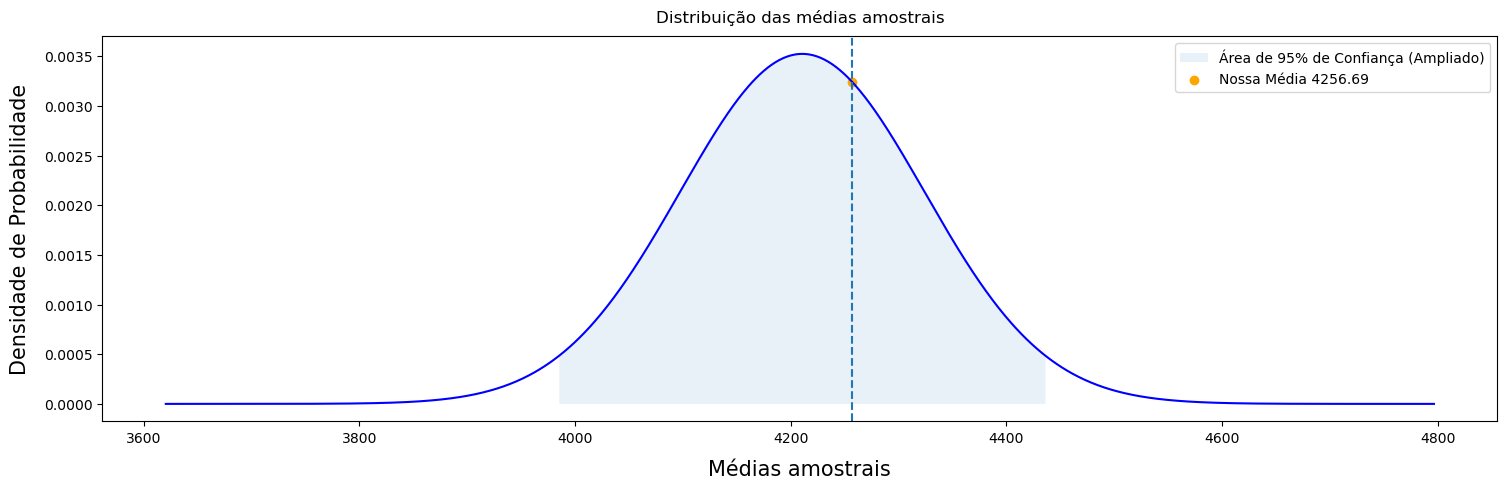

Nossa média: 4256.686046511628 & a médias das amostras: 4210.75 são valores próximos
Podemos também notar que nossa média se encontra em uma área de 95% de chance de ocorrer
Nosso erro padrão um pouco alto: 61.44 indica que o IC à 95% é 4136.26 até 4377.11 


In [7]:
nossa_media_amostral_1 = np.mean(amostra_maior['body_mass_g'])
nosso_erro_padrao = np.std(amostra_maior['body_mass_g'], ddof=1) / np.sqrt(len(amostra_maior))
limite_inferior_conf_nossa_amostra = nossa_media_amostral_1 - (1.96*nosso_erro_padrao) #Margem de erro
limite_superior_conf_nossa_amostra = nossa_media_amostral_1 + (1.96*nosso_erro_padrao) #Margem de erro

df = penguins.copy()

#vamos aplicar diversas amostragens:

lista_repeticao = list(range(1,300))
lista_vazia = []
for x in lista_repeticao:
    amostra = df.sample(n=50, replace=True)
    value = np.mean(amostra['body_mass_g'])
    lista_vazia.append(value)

dados = {'Amostras':lista_repeticao,
        'Medias':lista_vazia}

dados = pd.DataFrame(dados)


media_das_medias_amostrais = np.mean(dados['Medias'])
desvio_padrao_das_medias = np.std(dados['Medias'],ddof=1)
erro_padrao = desvio_padrao_das_medias / np.sqrt(len(dados))




x = np.linspace(min(dados['Medias']) - 300, max(dados['Medias']) + 300, 1000)
y = st.norm.pdf(x, media_das_medias_amostrais, desvio_padrao_das_medias)

lower_bound_ampliado = media_das_medias_amostrais - 2 * desvio_padrao_das_medias
upper_bound_ampliado = media_das_medias_amostrais + 2 * desvio_padrao_das_medias

plt.figure(figsize=(18, 5))
plt.title('Distribuição das médias amostrais', pad=10, fontsize=12)
sns.lineplot(x = x, y = y, color='b')
plt.xlabel(xlabel='Médias amostrais', labelpad=10, fontsize=15)
plt.ylabel(ylabel='Densidade de Probabilidade', labelpad=10, fontsize=15)
plt.fill_between(x, y, where=(x >= lower_bound_ampliado) & (x <= upper_bound_ampliado), alpha=0.1,
                 label='Área de 95% de Confiança (Ampliado)')
plt.scatter(x = nossa_media_amostral_1, y = st.norm.pdf(nossa_media_amostral_1,media_das_medias_amostrais, desvio_padrao_das_medias), label = f'Nossa Média {nossa_media_amostral_1:.2F}', color='orange')
plt.axvline(x = nossa_media_amostral_1, linestyle='--')
plt.legend()
plt.show()
print(f'Nossa média: {nossa_media_amostral_1} & a médias das amostras: {media_das_medias_amostrais:.2F} são valores próximos\nPodemos também notar que nossa média se encontra em uma área de 95% de chance de ocorrer')
print(f'Nosso erro padrão um pouco alto: {nosso_erro_padrao:.2F} indica que o IC à 95% é {limite_inferior_conf_nossa_amostra:.2F} até {limite_superior_conf_nossa_amostra:.2F} ')

#### Portanto, visto que amostras relativamente grandes, podemos confiar na média independentemente se a distribuição de nossa amostra segue uma distribuição com desvios de uma normal. O ideia, sempre será aplicar o teste às diversas amostras encontradas em um intervalo de 95% (2 desvios) e calcular o erro tipo II e poder de cada ponto

#### Mas mantenha em mente que por mais que testes paramétricos sejam mais fortes com grandes amostras, sempre equipare o valor-p com testes não paramétricos correspondentes e verifique outliers em seus dados


In [11]:
##Biblioteca usada será statsmodels
##Para testes de duas amostras sem homocedasticidade, usar o param usevar = 'unequal'


species_abs_freq = df.species.value_counts()
island_abs_freq = df.island.value_counts()
sex_abs_freq = df.sex.value_counts()

import statsmodels.stats as sts
from statsmodels.stats.weightstats import DescrStatsW
import statsmodels.stats.proportion as stpr

desc = sts.weightstats.DescrStatsW(amostra_maior['body_mass_g'])

#Teste t para uma média
#H0 = 4200 é igual a média da massa em gramas dos penguins
#HA = média da massa em gramas dos penguins é diferente de 6000
#alternative -> 'two-sided' = bicaudal, 'larger' - massa media é maior que 6000, 'smaller' - massa média é menor que 6000
teste_t_1_amostra = desc.ttest_mean(value = 4000, alternative='two-sided')
t_statistic, p_value_t, df_t = teste_t_1_amostra
ci_mean = desc.tconfint_mean(alpha = 0.05) #igual na inferência, assim temos acesso ao nossos intervalos de confiança para a média



#Teste t para duas médias
desc2 = sts.weightstats.DescrStatsW(amostra_menor['body_mass_g'])
desc_g = sts.weightstats.CompareMeans(desc,desc2)
#H0 médias dos grupos são iguais
#HA médias diferentes
#Caso não haja homocedasticidade adicionar parâmetro usevar='unequal' (correção de Welch)
teste_t_2_amostras = desc_g.ttest_ind(alternative='two-sided')
t_statistic_t2, p_value_t2, df_2 = teste_t_2_amostras
ci_mean_t_2 = desc_g.tconfint_diff(alpha = 0.05)




#Teste Z para uma média
#H0 = 6000 é igual a média da massa em gramas dos penguins
#HA = média da massa em gramas dos penguins é diferente de 6000
#alternative -> 'two-sided' = bicaudal, 'larger' - massa media é maior que 6000, 'smaller' - massa média é menor que 6000
teste_z_1_amostra = desc.ztest_mean(value = 6000, alternative = 'larger')
z_statistic, p_value_z = teste_z_1_amostra
ci_mean_z = desc.zconfint_mean()


#Teste Z para uma proporção 
df = penguins.copy()
tamanho = len(df)
z_prop_1 = sts.proportion.proportions_ztest(count = sex_abs_freq[0] , nobs =  tamanho, value= 10)
z_prop_stats, p_value  = z_prop_1
z_prop_1_cf = sts.proportion.proportion_confint(count = sex_abs_freq[0], nobs = tamanho)



#Test Z para duas proporções - não temos dados ao teste mas segue a lógica e código
#z_prop_2 = sts.proportion.test_proportions_2indep(count1=, nobs1=, count2=, nobs2=)
#z_prop_2_cf = sts.proportion.confint_proportions_2indep(count1=, nobs1=, count2=, nobs2=)




print(f'Teste t 1 amostra p_value: {p_value_t} e IC de: {ci_mean}')
print(f'Teste t 2 amostras p_value: {p_value_t2} e IC de: {ci_mean_t_2}')
print(f'Teste z 1 amostra p_value: {p_value_z} e IC de: {ci_mean_z}')
print(f'Teste z 1 proporção p_value: {p_value} e IC de: {z_prop_1_cf}')


Teste t 1 amostra p_value: 4.6843387753793726e-05 e IC de: (4135.40782907722, 4377.964263946035)
Teste t 2 amostras p_value: 0.5120019518880634 e IC de: (-173.42930681556027, 346.801399838816)
Teste z 1 amostra p_value: 1.0 e IC de: (4136.266141991941, 4377.105951031314)
Teste z 1 proporção p_value: 0.0 e IC de: (0.4529804376554914, 0.5586474693212529)


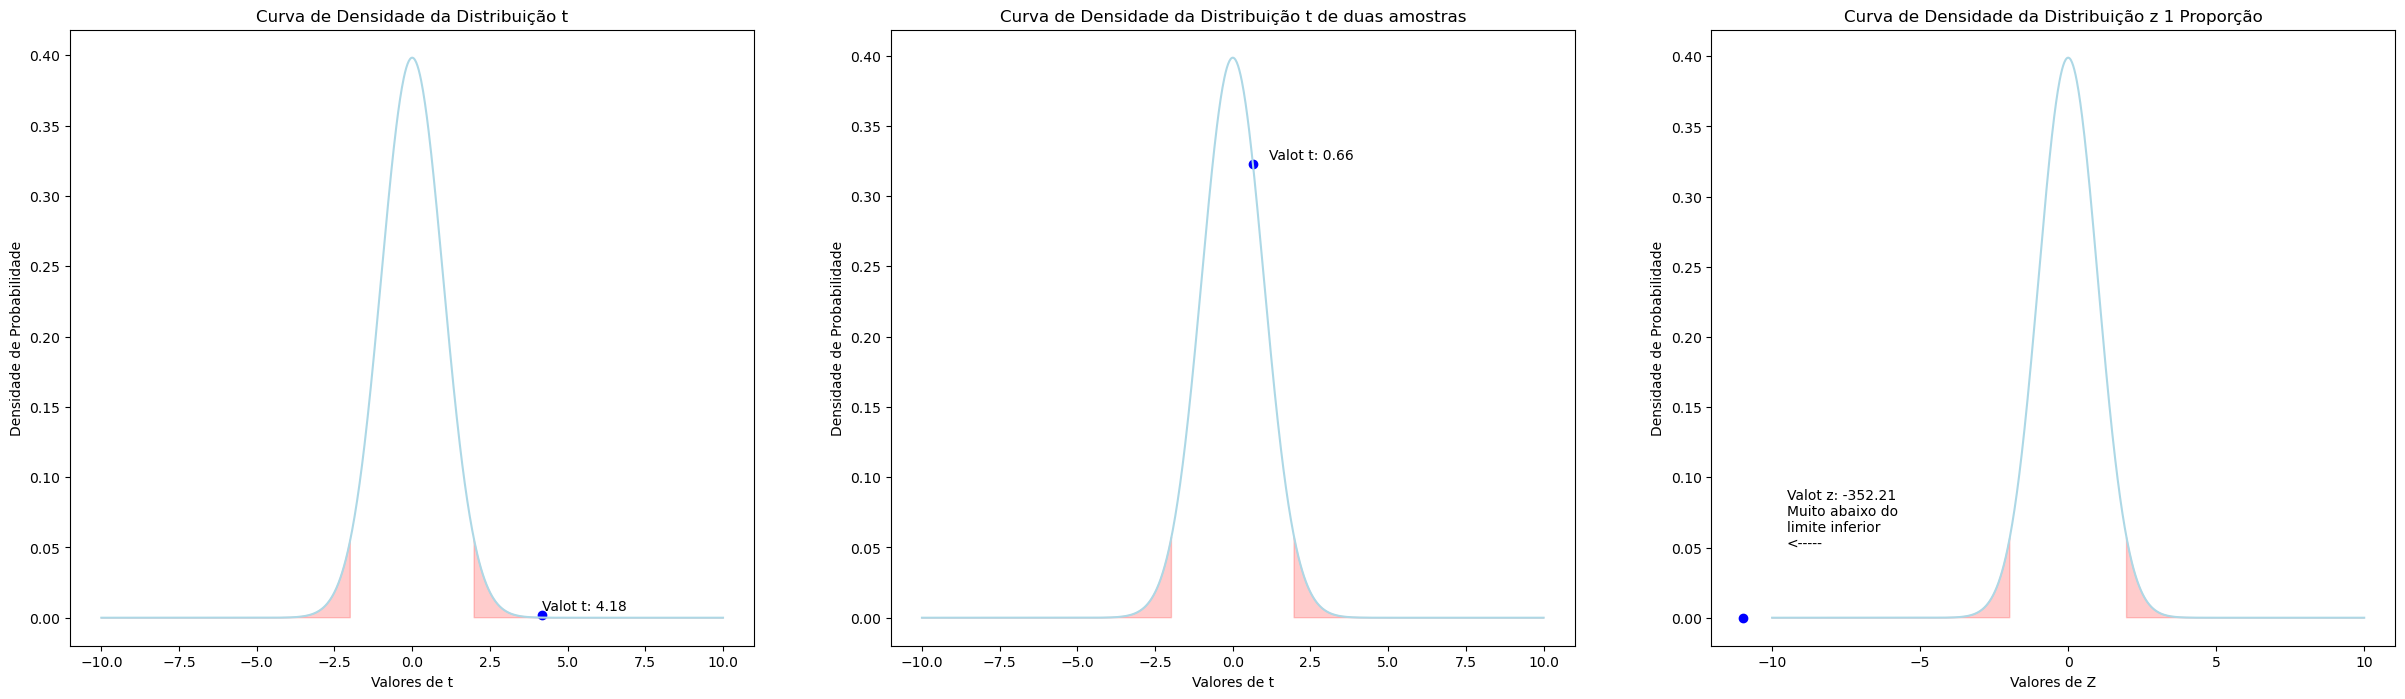

In [12]:
#para criar um gráfico usaremos scipy para calcular o ponto da região critica e dados aleatórios para preencher a curva
df_t = len(amostra_maior) - 1 #teste t
df2 = (len(amostra_maior) + len(amostra_menor)) - 2 #teste t

alpha = 0.05

t_critico = st.t.ppf(1 - alpha / 2, df_t) #st.t.ppf() -> usamos ppf() para retornar o ponto critico 
t_critico_2 = st.t.ppf(1 - alpha/2, df2)
z_prop_critc = st.norm.ppf(1 - alpha/2)

x = np.linspace(-10, 10, 1000) #criando faixa de valores
x2 = np.linspace(-10,10,1000)


y_t_1 = st.t.pdf(x, df_t)
y_t_2 = st.t.pdf(x2, df2)
y_z = st.norm.pdf(x2)

y_1 = st.t.pdf(t_statistic, df_t)
y_2 = st.t.pdf(t_statistic_t2, df2)
y_3 = st.norm.pdf(z_prop_stats)




f, ax = plt.subplots(1,3,figsize=(30,8))

_ = sns.lineplot(x = x, y = y_t_1, ax=ax[0], color='lightblue')
ax[0].scatter(x = t_statistic ,y = st.t.pdf(t_statistic, df_t)+0.002, color='blue')
ax[0].fill_between(x, 0, y_t_1, where=(x < - t_critico)| (x > t_critico), color='red',alpha = 0.2)
ax[0].set_title('Curva de Densidade da Distribuição t', fontsize=12)
ax[0].set_xlabel('Valores de t')
ax[0].set_ylabel('Densidade de Probabilidade')
ax[0].text(x = t_statistic, y = y_1 + 0.005, s=f'Valot t: {t_statistic:.2F}')
ax[0].grid(False)


_ = sns.lineplot(x = x2, y = y_t_2, ax=ax[1], color='lightblue')
ax[1].scatter(x = t_statistic_t2 ,y = st.t.pdf(t_statistic_t2, df2)+0.002, color='blue')
ax[1].fill_between(x2, 0, y_t_2, where=(x2 < - t_critico_2)| (x2 > t_critico_2), color='red',alpha = 0.2)
ax[1].set_title('Curva de Densidade da Distribuição t de duas amostras', fontsize=12)
ax[1].set_xlabel('Valores de t')
ax[1].set_ylabel('Densidade de Probabilidade')
ax[1].text(x = t_statistic_t2 + 0.5, y = y_2 + 0.005, s=f'Valot t: {t_statistic_t2:.2F}')
ax[1].grid(False)



_ = sns.lineplot(x = x2, y = y_z,  ax=ax[2], color='lightblue')
ax[2].fill_between(x2, 0, y_z, where=(x2 < - z_prop_critc)| (x2 > z_prop_critc), color='red',alpha = 0.2)
ax[2].scatter(x = -11, y = 0, color='blue')
ax[2].set_title('Curva de Densidade da Distribuição z 1 Proporção', fontsize=12)
ax[2].set_xlabel('Valores de Z')
ax[2].set_ylabel('Densidade de Probabilidade')
ax[2].text(x = -10 + 0.5, y = 0.05, s=f'Valot z: {z_prop_stats:.2F}\nMuito abaixo do\nlimite inferior\n<-----')
ax[2].grid(False)




plt.show()

In [13]:
#Teste Chi-Squared
#H0 - as categorias (variáveis) são independentes
#HA - as categorias (variáveis) são dependentes
df = penguins.copy()
from statsmodels.stats.contingency_tables import Table
df_contingency = pd.pivot_table(df, index = 'sex', columns = 'species', aggfunc = 'size', fill_value=0)
table = Table(df_contingency)
result = table.test_nominal_association()

print(result)

df          2
pvalue      0.8946619685045746
statistic   0.2226186417427462


#### Feito os teste e plotado os gráficos, podemos notar que no teste t de uma amostra, tivemos um valor t dentro da zona de rejeição, o teste t de duas amostras fora da zona e o teste z de uma proporção dentro da zona também. Então temos uma ideia de que no primeiro e terceiro teste as diferenças são estatísticamente significativas, porém no segunda não temos provas o suficiente para rejeitar a H0 de que as médias são iguais

## Agora, para nossos três gráficos vamos plotar a curva de poder e OC dos testes, ela vai nos ajudar a ter uma noção do poder do teste e probabilidade do erro tipo II para cada média ou diferença

### Efeito d de Cohen

O efeito d de Cohen é uma medida estatística utilizada para quantificar a diferença entre duas médias populacionais em termos de desvio padrão. É especialmente útil em estudos experimentais para avaliar o tamanho do efeito de uma intervenção, tratamento ou manipulação experimental.

1. **A fórmula para calcular o efeito d de Cohen é:**

$$ d = \frac{\bar{X}\_1 - \bar{X}\_2}{s} $$

Onde:

- $\bar{X}_1$ e $\bar{X}_2$ são as médias das duas amostras comparadas.
- $s$ é o desvio padrão combinado das duas amostras.

#### Interpretação do Efeito d:

- **Tamanho do Efeito:** O valor de d indica o tamanho do efeito da diferença entre as duas médias. Quanto maior o valor de d, maior é a diferença relativa entre as médias.

- **Direção do Efeito:** O sinal de d (positivo ou negativo) indica a direção da diferença entre as médias. Um valor positivo de d indica que a média de $\bar{X}_1$ é maior do que a média de $\bar{X}_2$, enquanto um valor negativo indica o oposto.

- **Interpretação Geral:** Segundo as diretrizes comuns de Cohen, um efeito d de cerca de 0,2 é considerado pequeno, 0,5 é considerado médio e 0,8 ou mais é considerado grande. Esses valores são usados para contextualizar a significância prática da diferença observada.

#### Leitura do Efeito d:

- **Comparação de Estudos:** O efeito d de Cohen facilita a comparação entre estudos diferentes, mesmo quando as unidades de medida podem variar, pois é uma medida padronizada.

- **Decisões de Política e Prática:** Ajuda na interpretação das implicações práticas dos resultados estatísticos, ajudando a decidir se uma diferença é clinicamente ou pragmaticamente significativa.

Efeito de cohen mede a magnitudade da diferença entre médias de dois grupos os comparativas

E para poder medir o poder de cada e subtraír 1 por ele mesmo, e teremos a probabilidade do Erro Tipo II

Depois podemos usar esse d-Cohen para calcular poder em funções do statsmodels

2. **Cálculo do Poder do Teste:**

   Para um teste unicaudal à direita (para detectar se $\bar{X}$ é maior que $\mu_{H_0}$) ou bicaudal, o poder do teste pode ser calculado usando a distribuição normal padrão:

   - **Teste Unicaudal (à direita):**
     $$ \text{Poder} = P(Z > Z\_{\text{crítico}}) $$

   - **Teste Bicaudal:**
     $$ \text{Poder} = P(Z > Z*{\text{crítico}}) + P(Z < -Z*{\text{crítico}}) $$

   Onde:

   - $Z_{\text{crítico}}$ é o valor crítico correspondente ao nível de significância $\alpha$ (por exemplo, $Z_{\text{crítico}} = Z_{\alpha}$ para um teste unicaudal ou $Z_{\text{crítico}} = Z_{\alpha/2}$ para um teste bicaudal).

### Agora, caso não tenhamos o d-Cohen podemos calcular por fórmulas de Poder do Teste e Cálculos Relacionados

1. **Poder do Teste:**

O poder do teste é a probabilidade de rejeitar corretamente a hipótese nula ($H_0$) quando ela é falsa (ou seja, quando a hipótese alternativa $H_A$ é verdadeira). É dado por:

$$ \text{Poder do Teste} = 1 - \beta $$

Onde $\beta$ é o erro tipo II, a probabilidade de não rejeitar $H_0$ quando $H_A$ é verdadeira.

2. **Cálculo do Z-Estatístico:**

O Z-estatístico é usado para comparar a média amostral com a média sob a hipótese nula, normalizado pelo erro padrão (SE):

$$ Z*{\text{estatístico}} = \frac{\bar{X} - \mu*{H_0}}{SE} $$

Onde:

- $\bar{X}$ é a média amostral.
- $\mu_{H_0}$ é a média sob a hipótese nula.
- $SE$ é o erro padrão da média.

3. **Cálculo da Média Amostral Crítica:**

A média amostral crítica é a média teórica que levaria à rejeição da hipótese nula, calculada usando o Z-estatístico:

$$ \bar{X}_{\text{crítica}} = \mu_{H*0} + Z*{\text{estatístico}} \cdot SE $$

4. **Z-Hat (Zha):**

O Z-Hat (Zha) é usado para calcular a probabilidade do erro tipo II. Ele representa a distância entre a média amostral crítica e a média sob a hipótese alternativa, normalizado pelo erro padrão:

$$ Z*{\text{ha}} = \frac{\bar{X}*{\text{crítica}} - \mu\_{H_A}}{SE} $$

Onde $\mu_{H_A}$ é a média sob a hipótese alternativa.

5. **Probabilidade do Erro Tipo II por Z-Hat:**

A probabilidade do erro tipo II por Z-Hat é a área sob a curva normal padrão à direita de Z-Hat:

$$ P(\text{Erro Tipo II}) = P(Z > Z\_{\text{ha}}) $$

### Considerações:

- O poder do teste aumenta com o aumento do tamanho da amostra e com o aumento do efeito do tratamento ou diferença a ser detectada.
- O Z-Hat é usado para calcular a probabilidade do erro tipo II, que é crucial para avaliar a sensibilidade do teste em detectar efeitos verdadeiros.

Estas fórmulas são essenciais para compreender como calcular e interpretar o poder do teste e a probabilidade do erro tipo II em estudos de hipóteses estatísticas.

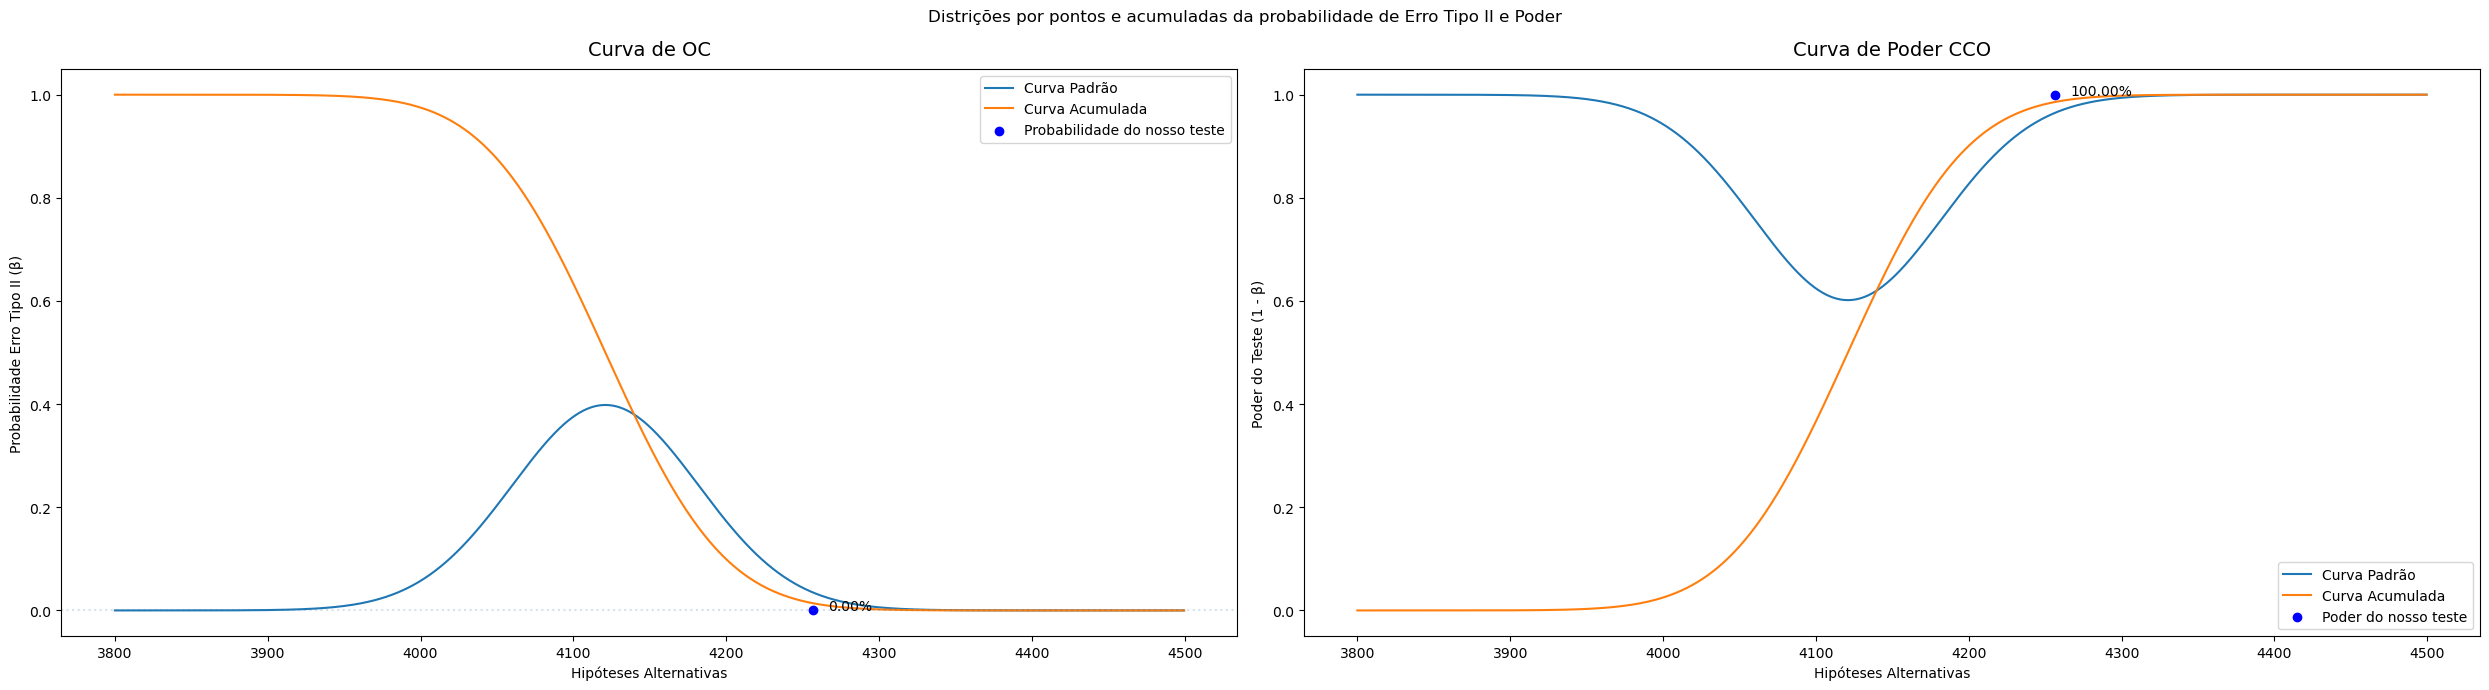

In [14]:
from statsmodels.stats.power import TTestIndPower #para testes de poder T de duas amostras
from statsmodels.stats.power import TTestPower #para testes de poder t de uma amostra
from statsmodels.stats.power import NormalIndPower #para teste z prop e z media
from pingouin import compute_effsize_from_t #melhor método para calculo de efeito de poder para teste t usando o t estatístico



d_cohen_t_1 = compute_effsize_from_t(t_statistic, N=len(amostra_maior))
power_analysis = TTestIndPower()
power = power_analysis.power(effect_size=d_cohen_t_1,
                                 nobs1=len(amostra_maior),
                                 alpha=0.05)
nosso_b_t1 = 1 - power # A probabilidade do erro tipo II do nosso teste aplicado

#desc = sts.weightstats.DescrStatsW(amostra_maior['body_mass_g']) 
#desc é um obj que referencia um método do statsmodels com diversas estatísticas
dif = desc.mean #nossa média / H0

lista_b_ponto_t1 = [] #lista vazia que irá receber b pontual
lista_p__ponto_t1 = [] #lista vazia que irá receber poder pontual
lista_b_ac_t1 = [] #lista vazia que irá receber b acumulado
lista_p__ac_t1 = [] #lista vazia que irá receber poder acumulado
df = len(amostra_maior) - 1 #nossos graus de liberade
t_critico = st.t.ppf(1 - alpha / 2, df) #nosso t critico
x = 4000 + (t_critico * (desc.std / np.sqrt(len(amostra_maior)))) #nossa média crítica
lista_valores_para_equiparar_t1 = np.arange(3800, 4500, 0.5) #criando uma lista onde cada valor será testado
for i in lista_valores_para_equiparar_t1:
    t = (x - i) / (desc.std / np.sqrt(len(amostra_maior))) #nosso t beta
    beta_ponto = st.t.pdf(t, df) #calculando probabilidade de t beta pontual
    beta_ac = st.t.cdf(t, df) #calculando probabilidade de t beta acumulada
    poder_ponto = 1 - beta_ponto
    poder_ac = 1 - beta_ac
    lista_b_ponto_t1.append(beta_ponto)
    lista_p__ponto_t1.append(poder_ponto)
    lista_b_ac_t1.append(beta_ac)
    lista_p__ac_t1.append(poder_ac)


plt.figure(figsize=(25, 7))

plt.subplot(1, 2, 1)
plt.title('Curva de OC', fontsize=14, pad=10)
plt.suptitle('Distrições por pontos e acumuladas da probabilidade de Erro Tipo II e Poder')
sns.lineplot(x=lista_valores_para_equiparar_t1, y =lista_b_ponto_t1, label='Curva Padrão')
sns.lineplot(x = lista_valores_para_equiparar_t1, y= lista_b_ac_t1, label='Curva Acumulada')
plt.xlabel('Hipóteses Alternativas')
plt.ylabel('Probabilidade Erro Tipo II (β)')
plt.scatter(x = dif, y = nosso_b_t1, label='Probabilidade do nosso teste', color='blue')
plt.axhline(nosso_b_t1, alpha = 0.2, linestyle='dotted')
plt.text(x = dif + 10, y=nosso_b_t1, s=f'{nosso_b_t1:.2%}')
plt.legend()


plt.subplot(1, 2, 2)
sns.lineplot(x=lista_valores_para_equiparar_t1, y=lista_p__ponto_t1, label='Curva Padrão')
sns.lineplot(x=lista_valores_para_equiparar_t1, y=lista_p__ac_t1, label='Curva Acumulada')
plt.title('Curva de Poder CCO', fontsize=14, pad=10)
plt.xlabel('Hipóteses Alternativas')
plt.ylabel('Poder do Teste (1 - β)')
plt.scatter(x = dif, y = power,label='Poder do nosso teste', color='blue')
plt.text(x = dif + 10, y=power, s=f'{power:.2%}')
plt.legend()



plt.tight_layout()
plt.show()

### Testes Não Paramétricos e suas Aplicações

Os testes não paramétricos são métodos estatísticos que não exigem que os dados sigam uma distribuição específica (como a distribuição normal). Eles são úteis quando os dados não atendem às suposições dos testes paramétricos tradicionais ou quando os dados são ordinais.

#### Quando usar testes não paramétricos:

- **Dados Ordinais:** Quando os dados são classificados ou ordenados, mas a escala exata não é necessariamente linear.
- **Distribuição Não Normal:** Quando os dados não seguem uma distribuição normal e a transformação dos dados não é adequada ou desejável.

- **Pequenas Amostras:** Quando as amostras são pequenas e os testes paramétricos podem não ser robustos o suficiente.

#### Teste de Mann-Whitney (U de Mann-Whitney) - (Teste $t$ de duas amostras independentes):

O teste de Mann-Whitney é usado para comparar duas amostras independentes. Ele avalia se a distribuição de probabilidades de uma amostra é maior ou menor do que a de outra amostra. A estatística U de Mann-Whitney é calculada como:

$$ U = R_1 - \frac{n_1(n_1 + 1)}{2} $$

Onde:

- $R_1$ é a soma dos postos da primeira amostra.
- $n_1$ é o tamanho da primeira amostra.

#### Teste de Wilcoxon para amostras pareadas (Wilcoxon Signed-Rank Test) - (Teste $t$ de duas amostras pareadas):

O teste de Wilcoxon para amostras pareadas é usado para comparar duas amostras relacionadas ou emparelhadas. Ele testa se há uma diferença significativa entre as medições antes e depois de uma intervenção. A estatística de teste de Wilcoxon é calculada usando os postos das diferenças entre pares de observações.

#### Teste de Kruskal-Wallis - (ANOVA):

O teste de Kruskal-Wallis é uma extensão do teste de Mann-Whitney para mais de dois grupos independentes. Ele é usado para determinar se há diferenças significativas entre três ou mais grupos independentes. A estatística de teste de Kruskal-Wallis é calculada como:

$$ H = \frac{12}{N(N + 1)} \sum\_{i=1}^{k} \frac{R_i^2}{n_i} - 3(N + 1) $$

Onde:

- $R_i$ é a soma dos postos para o grupo $i$.
- $n_i$ é o tamanho do grupo $i$.
- $N$ é o total de observações em todos os grupos combinados.
- $k$ é o número de grupos.

### Considerações:

- Os testes não paramétricos são úteis quando as suposições dos testes paramétricos não são atendidas ou quando não se deseja fazer suposições sobre a distribuição dos dados.
- Eles fornecem uma abordagem robusta e flexível para análise estatística em uma variedade de situações, especialmente quando os dados são não normais ou a escala de medição é ordinal.

- A escolha do teste não paramétrico adequado depende da natureza dos dados e das perguntas de pesquisa específicas.

Esses testes desempenham um papel crucial na análise estatística, oferecendo alternativas válidas e confiáveis aos testes paramétricos tradicionais, especialmente em situações onde as suposições paramétricas não são atendidas.

In [15]:
from pingouin import mwu #boa bliblioteca para testes não paramétricos, simples

In [16]:
teste_u = mwu(amostra_maior['body_mass_g'], amostra_menor['body_mass_g'])
teste_u

,U-val,alternative,p-val,RBC,CLES
MWU,4633.0,two-sided,0.405455,-0.077442,0.538721


In [17]:
teste_t_2_amostras

(0.6567907009773316, 0.5120019518880634, 220.0)

### Vale ressaltar que o pingouins é uma biblioteca mais fácil e ágil de testes 

```python from pingouin import ttest, ptests, welch_anova, anova, mancova -> testes ```

### Temos também testes de normalidade e homocedasticidade

```python from pingouin import homoscedasticity, normality, anderson```

In [18]:
##Temos também o calculo para teste t pareado
from pingouin import wilcoxon

#teste_u_pareado = wilcoxon() #x e y precisam ter o mesmo tamanho

In [19]:
##Vale ressaltar algo interessante de pingouins, o shift plot e o display

from pingouin import print_table, plot_shift, qqplot

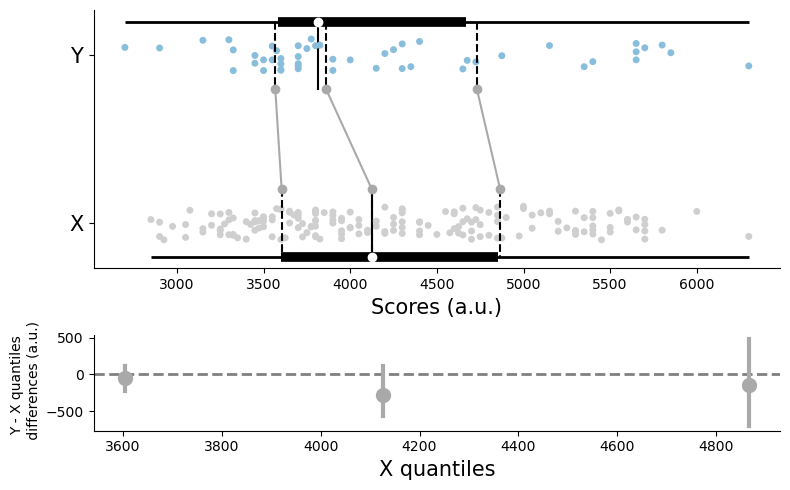

In [20]:
##Bom grárfico paraa avaliar em quantis as mudanças de valores entre dois grupos
plot_shift(amostra_maior['body_mass_g'], amostra_menor['body_mass_g'],percentiles=[25, 50, 75], show_median=True, violin=False) #Bom grárfico paraa avaliar em quantis as mudanças de valores entre dois grupos
plt.show()

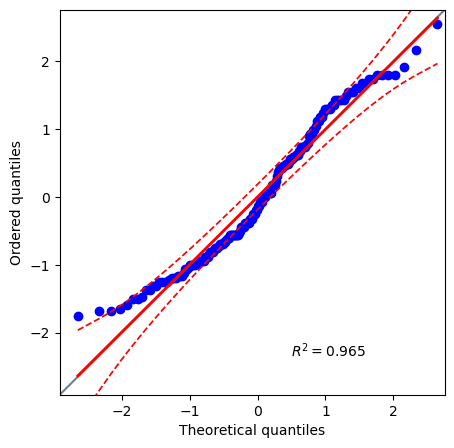

In [21]:
fig, ax1 = plt.subplots(figsize=(9,5))
_ = qqplot(amostra_maior['body_mass_g'], dist='norm', ax=ax1)
plt.show()

#### dica de gráfico do pingouin -> Gráfico para correlação intra sujeitos - avaliar relação entre duas variáveis quebradas por algu

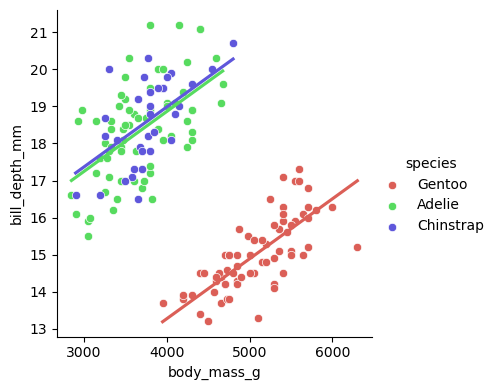

In [22]:
from pingouin import plot_rm_corr


plot_rm_corr(data=amostra_maior, x='body_mass_g', y='bill_depth_mm',
                    subject='species', legend=True)

                    
plt.show()